<a href="https://colab.research.google.com/github/oroobyaseen/coursera.exercises/blob/gh-pages/VGG16_(1)_with_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [256, 256]

train_path = '/content/drive/MyDrive/New folder (4)/train'
valid_path = '/content/drive/MyDrive/New folder (4)/val'

In [ ]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/New folder (4)/train/*')

In [ ]:
folders

['/content/drive/MyDrive/New folder (4)/train/Meningioma',
 '/content/drive/MyDrive/New folder (4)/train/Glioma',
 '/content/drive/MyDrive/New folder (4)/train/Pituitary tumor']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [ ]:
len(folders)

3

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=40,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/New folder (4)/train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2456 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/New folder (4)/val',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 616 images belonging to 3 classes.


In [ ]:
#@title Default title text
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=40,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/40
77/77 [==============================] - 1122s 14s/step - loss: 0.9668 - accuracy: 0.6429 - val_loss: 0.5700 - val_accuracy: 0.7873
Epoch 2/40
77/77 [==============================] - 76s 990ms/step - loss: 0.5010 - accuracy: 0.7932 - val_loss: 0.4164 - val_accuracy: 0.8328
Epoch 3/40
77/77 [==============================] - 76s 990ms/step - loss: 0.5239 - accuracy: 0.7919 - val_loss: 0.3918 - val_accuracy: 0.8409
Epoch 4/40
77/77 [==============================] - 76s 986ms/step - loss: 0.3934 - accuracy: 0.8449 - val_loss: 0.3629 - val_accuracy: 0.8653
Epoch 5/40
77/77 [==============================] - 76s 992ms/step - loss: 0.3738 - accuracy: 0.8457 - val_loss: 0.4383 - val_accuracy: 0.8474
Epoch 6/40
77/77 [==============================] - 77s 1s/step - loss: 0.3741 - accuracy: 0.8498 - val_loss: 0.3427 - val_accuracy: 0.8636
Epoch 7/40
77/77 [==============================] - 77s 997ms/step - loss: 0.3733 - accuracy: 0.8579 - val_loss: 0.6248 - val_accuracy: 0.7841
Ep

In [ ]:
import matplotlib.pyplot as plt

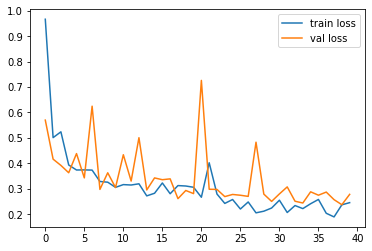

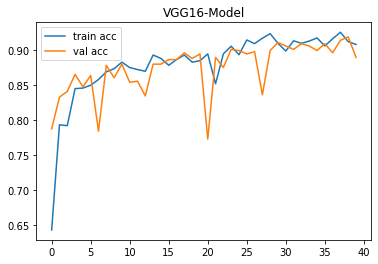

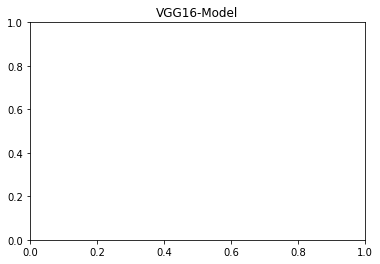

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.title('VGG16-Model')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
plt.title('VGG16-Model')
plt.show()

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')